## 특징별로 시각화(2)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### 2. 송신자 주소별로 시각화
관련 헤더
- /header/header/mail_from : 최초 송신자 메일주소
- /header/received/n/by : 중간/최종 송신 호스트
    * /header/received/n+1/by == /header/received/n/from
        <br>값이 같지 않은 경우 있음
    * n == 0인 경우 최종 수신 호스트
    * n == 1인 경우 최종 송신 호스트
    * last_num == 0인 경우
        <br>최종 송신 호스트 == 최초 송신 호스트

<br>/header/received/n/from 에는 ip주소 있는 경우가 많음
<br>메일 주소 얻디 위해 /header/received/n/by 사용
<br>/header/received/n/by 에도 ip주소가 있는 경우가 많음 **=>어떻게 처리하지**

In [6]:
eml_df = pd.read_csv("../../parsed_eml_3.csv")

In [7]:
# 이전의 index값이 계속 쌓임, 일단 제거
del eml_df["Unnamed: 0"]
del eml_df["Unnamed: 0.1"]
del eml_df["Unnamed: 0.1.1"]

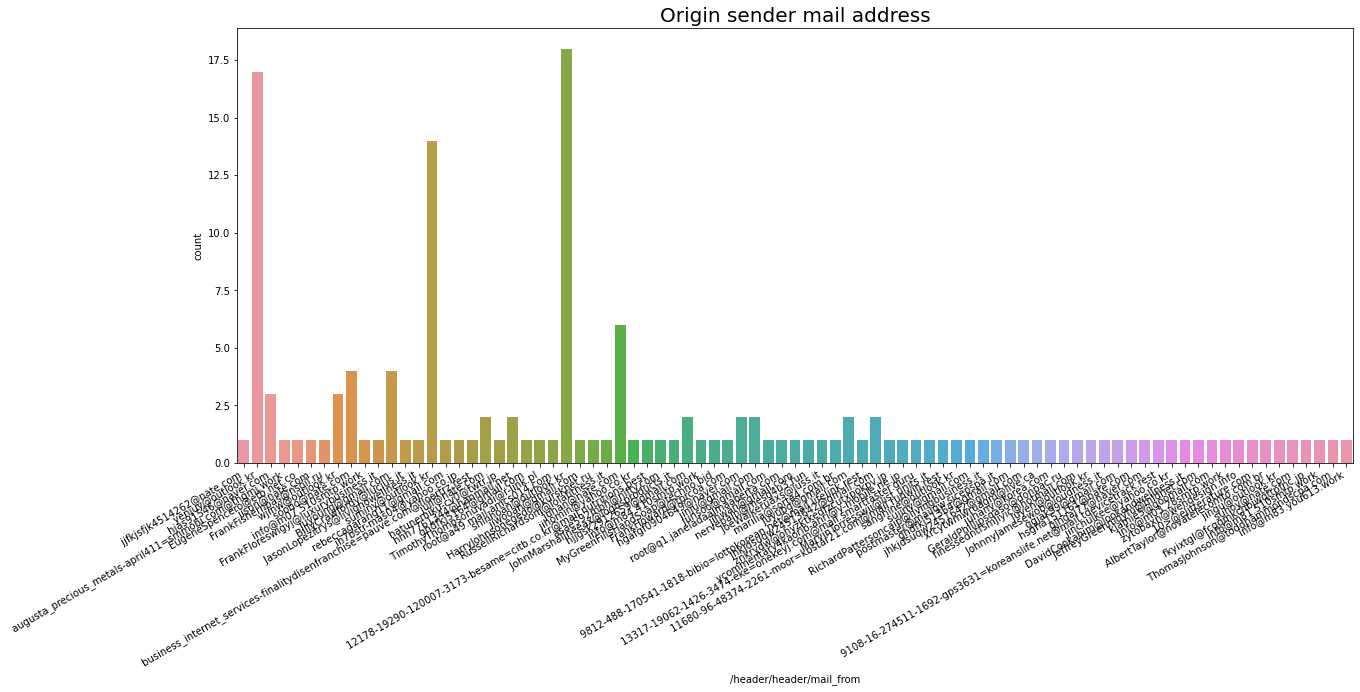

In [5]:
# 최초 송신자 메일주소 시각화
plt.figure(figsize=(20,8))
plt.title('Origin sender mail address', fontsize=20)
sns.countplot(x="/header/header/mail_from", data=eml_df)
plt.xticks(rotation=30, ha='right')
plt.show()

In [12]:
is_one = eml_df['last_num'] == 1
more_than_one = eml_df.last_num > 1

In [49]:
temp_df = pd.DataFrame(index=eml_df.index)
temp_df.loc[is_one, "last_sender"] = eml_df.loc[is_one, "/header/header/mail_from"] # 최초 송신자이자 최종 송신자
temp_df.loc[more_than_one, "last_sender"] = eml_df.loc[more_than_one, "/header/received/1/by"]

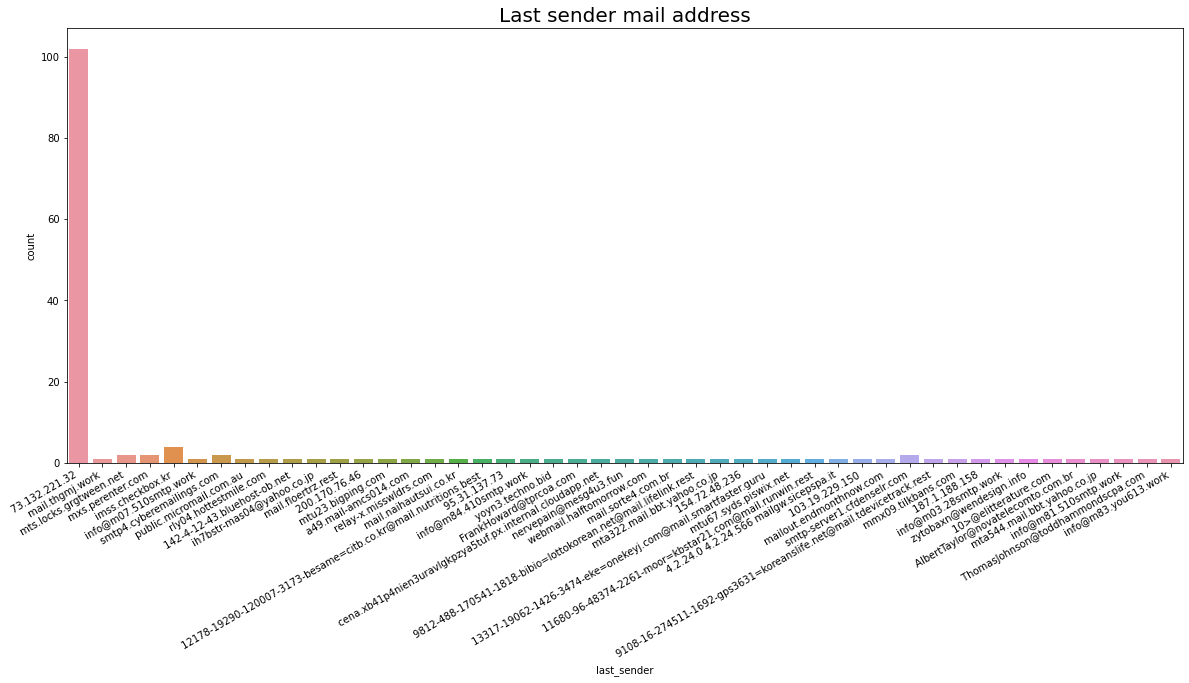

In [53]:
# 최종 송신자 주소 시각화
plt.figure(figsize=(20,8))
plt.title('Last sender mail address', fontsize=20)
sns.countplot(x="last_sender", data=temp_df)
plt.xticks(rotation=30, ha='right')
plt.show()

In [54]:
# 중간 송신자 주소 시각화